# Imports
In this section we import the necessary libraries for the model.

In [49]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Constants
IMAGE_SIZE = (48, 48)
SAMPLE_SIZE = 5
DATA_PATHS = {'train': "train", 'test': "test"}

# Data Pre-processing
The data for this model can be found [here](https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset). Once the data has been imported we define the `load_and_flatten` function which loads images from a directory, converts them to greyscale, resizes it to 48x48 pixels and stores it into a 1 dimensional array. This is done to prepare the images for our Neural Network. After loading training and test datasets, pixel values are normalized to [0, 1], and string labels (e.g. "Malignant") are encoded as integers (e.g., 0, 1) using the LabelEncoder for model compatibility.

In [50]:
def load_dataset(directory):
    images = []
    labels = []

    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue

        for filename in os.listdir(label_dir):
            img_path = os.path.join(label_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, IMAGE_SIZE)
            images.append(img.flatten())
            labels.append(label)

    return np.array(images), np.array(labels)

X_train, y_train = load_dataset(DATA_PATHS['train'])
X_test, y_test = load_dataset(DATA_PATHS['test'])

X_train = X_train / 255.0
X_test = X_test / 255.0

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)


# Modelling
Once the data has been pre-processed we fit the data to our neural network.

In [51]:
mlp = MLPClassifier(
    activation="tanh",
    alpha=0.001,
    hidden_layer_sizes=(100,),
    learning_rate_init=0.001,
    max_iter=300
)

mlp.fit(X_train, y_train_enc)

MLPClassifier(activation='tanh', alpha=0.001, max_iter=300)

# Evaluation and Data Visualisation
Once data has been fitted to the model we make our predictions. After making these predictions we use the `inverse_transform` function to transform labels back to their original encoding. After this we create a classification report and choose 5 random images to display and compare their true values against their predicted values.

Classification Report:
              precision    recall  f1-score   support

      Benign       0.88      0.80      0.84      1000
   Malignant       0.82      0.89      0.85      1000

    accuracy                           0.84      2000
   macro avg       0.85      0.84      0.84      2000
weighted avg       0.85      0.84      0.84      2000



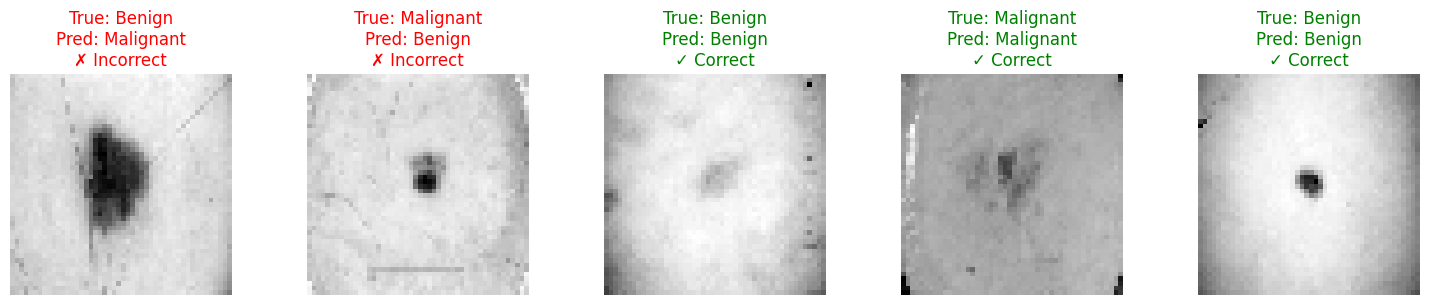

In [54]:
y_pred_enc = mlp.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_enc)

print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(15, 3))
for i, idx in enumerate(np.random.choice(len(X_test), size=SAMPLE_SIZE, replace=False)):
    ax = plt.subplot(1, SAMPLE_SIZE, i+1)
    image = X_test[idx].reshape(IMAGE_SIZE)
    true_label = y_test[idx]
    pred_label = y_pred[idx]

    # Formatting variables
    is_correct = true_label == pred_label
    status = "✓ Correct" if is_correct else "✗ Incorrect"
    color = "green" if is_correct else "red"

    ax.imshow(image, cmap='gray')
    ax.set_title(f"True: {true_label}\nPred: {pred_label}\n{status}", color=color)
    ax.axis('off')

plt.tight_layout()
plt.show()